In [1]:
import pandas as pd
df = pd.read_csv('CC_GENERAL.csv',index_col='CUST_ID')
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## what is this dataset?

source: kaggle

describes the behavior of about 9000 credit holders over a period of 6 months.

it includes 18 features.

## what can we use this data for?


- we can simply use this data to learn more about our customers...no specific objective rather than building our intuitions about customer behavior.
- looking for anomolous behavior -- customers whose behavior is out of the ordinary (this is a modeling task, we'll have to specify a model)
- clustering or segmenting customers based on their behavior
- we can choose a variable of interest from among the 18 features - and model it as a function of other variables.

In [2]:
## let's cluster

# first we start with some light eda

# eda will probably uncover some data wrangling/data processing tasks

# then we'll take a shot at clustering

In [7]:
df.shape

(8950, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [5]:
# df['CUST_ID'].nunique() == df.shape[0]

# above will throw an error after setting CUST_ID as index

True

## impute null values

In [15]:
df.isna().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [2]:
df.columns = [col.lower() for col in df.columns]

In [17]:
# visual inspection of obs with missing minimum payments
df.loc[df['minimum_payments'].isna(),:].head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
CUST_ID,,,,,,,,,,,,,,,,,
C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


In [3]:
import matplotlib.pyplot as plt

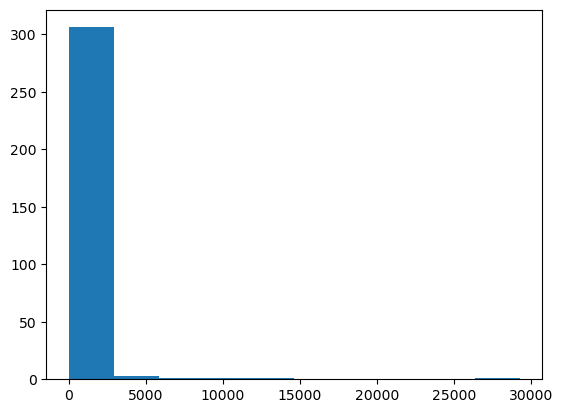

In [4]:
plt.plot()
plt.hist(df.loc[df['minimum_payments'].isna(),'payments'])
plt.show()


In [5]:
mask = (df['minimum_payments'].isna()) & (df['payments'] == 0)
df.loc[mask,:].shape[0]/313

0.7667731629392971

In [ ]:
# i think there's a connection between having a missing min payment and a payments of 0

In [ ]:
# we're going to impute min payments and we can take a number of different approaches

# just take the average or median of min payment data that we do have, and impute using that
# throw away the rows with missing data (reluctant to do that here)
# model based imputation (from very simple to very complex)

In [ ]:
# constant of proportionality
# 1. find another one of the features that is highly correlated with min payments (e.g. "payments")
# 2. take the ratio of avg(min payments)/avg(payments) = C
# 3. and let missing min payments be defined as payments*C

# payments*C = min payments
# C = min payments / payments 
# baby linear regression

# you can of course actually do a regression and impute using that

In [6]:
df.corr()['minimum_payments'].sort_values(ascending = False)

minimum_payments                    1.000000
balance                             0.398684
cash_advance                        0.140107
balance_frequency                   0.132569
installments_purchases              0.132172
credit_limit                        0.126671
payments                            0.126651
cash_advance_trx                    0.109739
cash_advance_frequency              0.098838
purchases_trx                       0.096333
purchases                           0.093860
tenure                              0.059444
oneoff_purchases                    0.048755
purchases_installments_frequency    0.030073
purchases_frequency                 0.003030
oneoff_purchases_frequency         -0.030327
prc_full_payment                   -0.140379
Name: minimum_payments, dtype: float64

In [7]:
# constant of proportionality between balance and min payments
# avg(min payments)/avg(balance)
C = df['minimum_payments'].mean()/df['balance'].mean()
imputed_min_payments = C*df.loc[df['minimum_payments'].isna(),'balance']
print(imputed_min_payments.mean(), df['minimum_payments'].mean())

306.822465338347 864.2065423050828


In [8]:
# very quickly - let's try to impute with linear regression

from sklearn.linear_model import LinearRegression

In [9]:

predictors = df.loc[~df['minimum_payments'].isna(),:]
predictors.dropna(inplace=True)
target = predictors['minimum_payments']
predictors.drop(columns = ['minimum_payments'],inplace = True)

/var/folders/g7/wg003dgd7td2scfxtm9wznth0000gn/T/ipykernel_79197/3282811061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors.dropna(inplace=True)
/var/folders/g7/wg003dgd7td2scfxtm9wznth0000gn/T/ipykernel_79197/3282811061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors.drop(columns = ['minimum_payments'],inplace = True)


In [10]:
predictors.shape[0] == target.shape[0]

True

In [ ]:
# before i make the model
# how do we know if the model is any good?
# do you guys know model evaluation for linear regression?
# R squared is one way
# briefly
# "percentage of the variance explained"
# "how much better is your model compared to the dummy model of always predicting the mean"
# 864 is the mean minimum payments
# naive model - always predict 864 regardless of other information you have
# interpretation - r2 0 is like always predicting the mean - and the closer you get to r2 of 1, is how much better you are than the mean

In [11]:
lm1 = LinearRegression()
lm1.fit(predictors,target)
lm1.score(predictors,target)

0.19672360257016308

In [ ]:
# r2 .19

# the question is --- is this better than the previous approach? ie the constant of proportionality
# we already know it is better than always predicting the mean value

In [18]:
# calculate R squared for constant of proportionality 
# i need ground truth minimum_payments (known values of minimum payments) = y
# i also need values of minimum_payments calculated using C*balance = y_hat
# Rsquared(y,y_hat) -> we get out a value

# target
predicted_minimum_payments_using_cop = C*df.loc[(~df['minimum_payments'].isna()) & (~df['credit_limit'].isna()),'balance']

In [19]:
# r2_score(y_true, y_pred,
from sklearn.metrics import r2_score
r2_score(target,predicted_minimum_payments_using_cop)

0.1509017635738128

In [25]:
# it seems the regression is a better imputation strategy

# we need to now generate predicted values of minimum_payments for the cases where minimum_payments is null using the regression
lm1.feature_names_in_

array(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'prc_full_payment', 'tenure'],
      dtype=object)

In [24]:
df.shape[1]

17

In [26]:
# create predictor matrix (table) by filtering data for cases where minimum_payments is null
predictors_imputation = df.loc[df['minimum_payments'].isna(),:].drop(columns = ['minimum_payments'])
predictors_imputation.info()
# drop minimum_payments column
# generate predictions

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, C10004 to C19187
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           313 non-null    float64
 1   balance_frequency                 313 non-null    float64
 2   purchases                         313 non-null    float64
 3   oneoff_purchases                  313 non-null    float64
 4   installments_purchases            313 non-null    float64
 5   cash_advance                      313 non-null    float64
 6   purchases_frequency               313 non-null    float64
 7   oneoff_purchases_frequency        313 non-null    float64
 8   purchases_installments_frequency  313 non-null    float64
 9   cash_advance_frequency            313 non-null    float64
 10  cash_advance_trx                  313 non-null    int64  
 11  purchases_trx                     313 non-null    int64  
 12  credi

In [27]:
imputed_minimum_payments_using_lm = lm1.predict(predictors_imputation)

In [29]:
imputed_minimum_payments_using_lm.shape

(313,)

In [31]:
# overwrite the nulls in df with these 313 values
df.loc[df['minimum_payments'].isna(),'minimum_payments'] = imputed_minimum_payments_using_lm

In [32]:
df.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        1
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

### inspect distributions

to-do

1. visual inspection (make a bunch of histograms)
2. note the presence of outliers
3. we need to ensure the data is on the same scale.
4. decide how to scale the data (normalize (0-1), standardize (map to normal distribution), ....)